# Gravitational acceletarion in a pendulum experiment

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os

### Reading the data and saving it

In [3]:
path = "\\Users\\Teresa\\Desktop\\COMPU\\Clases_Filipa\\Clases_Filipa\\pendulo"
data = np.load(path + '\\datos.npy')
#print(np.shape(data))

# We make 2 vectors, one with the different lenghts and the other with the respective errors
l=data[:, 0].copy()
l_err=data[:, 1].copy()

# We make a matrix with the times for 10 oscillations, each row is a different oscillation lenght 
time=np.zeros((11,10))
for i in range(0,11):
   for j in range(2,12):
      time[i,j-2]=data[i,j]
      j+=1
   i=i+1

print(time)
#print(data) 
#print(l)


[[20.05640437 20.05963423 20.02880293 20.04919752 20.05982868 20.11173776
  20.05356595 20.04985033 20.11175868 20.04829324]
 [21.03777478 21.04944117 21.02840233 21.06328741 21.04521451 21.02027374
  21.04115401 21.02989434 21.05528146 21.04242142]
 [21.93958408 21.97215824 22.00763047 21.99300118 21.98663794 21.98032397
  21.96255416 21.99397498 21.96471993 21.9828847 ]
 [22.86238279 22.87286153 22.88663756 22.90760653 22.86880205 22.86750249
  22.86246088 22.87985097 22.85209103 22.85472628]
 [23.75487852 23.73839293 23.74543798 23.77058917 23.75024196 23.744397
  23.73288188 23.75120172 23.75843325 23.72692261]
 [24.58795283 24.58688659 24.59157578 24.5610537  24.59750397 24.56669837
  24.57771734 24.58279614 24.57137225 24.5737635 ]
 [25.38105036 25.43665015 25.39019652 25.38059754 25.36748456 25.39635288
  25.38204713 25.37662751 25.39220239 25.37077851]
 [26.14205458 26.14853358 26.11334155 26.1595095  26.14412089 26.18612295
  26.1450315  26.17082307 26.15433138 26.14769478]
 [

### We make a function that calculates the average of the time it takes to make 10 oscillations (two options)

In [4]:
# First option: we make the average of the times from a vector of times, but I do not know what error to assign

def average_time1(t, n):
    """It calculates the average of a vector t of n components

    Args:
        t (array): vector of n components
        n (int): dimension of the vector

    Returns:
        float: average of the vector t
    """

    average = 0
    desvest = 0
    for i in range(0, n):
        average += t[i]
    
    desvest = np.std(t)
    result = [average / n, desvest]
    return result


print(average_time1(time[0, :], 10)[0], average_time1(time[0, :], 10)[1])

20.062907369751297 0.025798706204627386


In [5]:
# Second option: we calculate the period for a lenght and multiply it 10 times, and calculate the error with the error propagation formula

def average_time2(l, error_l):
    """Calculates the time it takes for 10 oscillations for a pendulum of length l and its error

    Args:
        l (float): lenght of the pendulum
        error_l (float): error in the lenght of the pendulum

    Returns:
        array: the first coordinate is the time it takes for 10 oscillations and the second coordinate is the error in the time
    """


    time=0
    error=0

    time=10*2*np.pi*np.sqrt(l/9.8)
    error=10*np.pi*error_l*np.sqrt(1/(error_l*9.8))
    solve=[time, error]

    return solve


print(average_time2(l[0],l_err[0])[0],average_time2(l[0],l_err[0])[1])

20.070899231544928 1.0035449615772467


### We plot the period as a function of its length

hwe


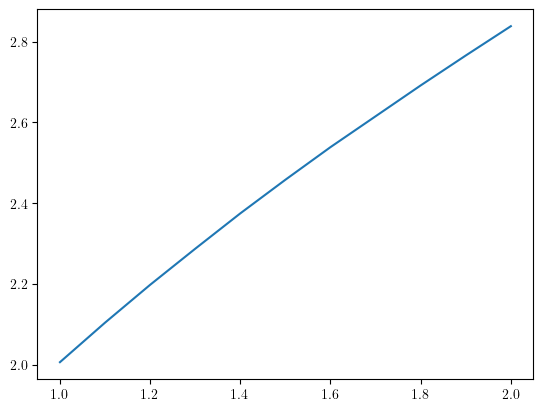

In [6]:
# To do this, we need to get the period for each length and its error in two separate vectors (for simplicity)

p=np.zeros(11)
p_err=np.zeros(11)
for i in range(0,11):
    for j in range(0,10):
    
        p[i]=average_time1(time[i,:],10)[0]/10
        p_err[i]=average_time1(time[i,:],10)[1]/10
        j +=1
    i + 1

# Now we plot the period 


plt.rcParams['text.usetex'] = True  

plt.plot(l,p, label = r'period')
#plt.xlabel(r'$\theta$', fontsize = 16)           
#plt.ylabel(r'$\sin(\theta)$', fontsize = 16)     

print('hwe')                            
#plt.title(r'\textbf{My second plot}', fontsize = 20)        
#plt.axis([0, 2*np.pi, -1,1])  # Sets the length of the two axis. (Compare with the previous one)
plt.show()